<a href="https://colab.research.google.com/github/mae001/Machine-Learning-projects/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2] # shift a bit

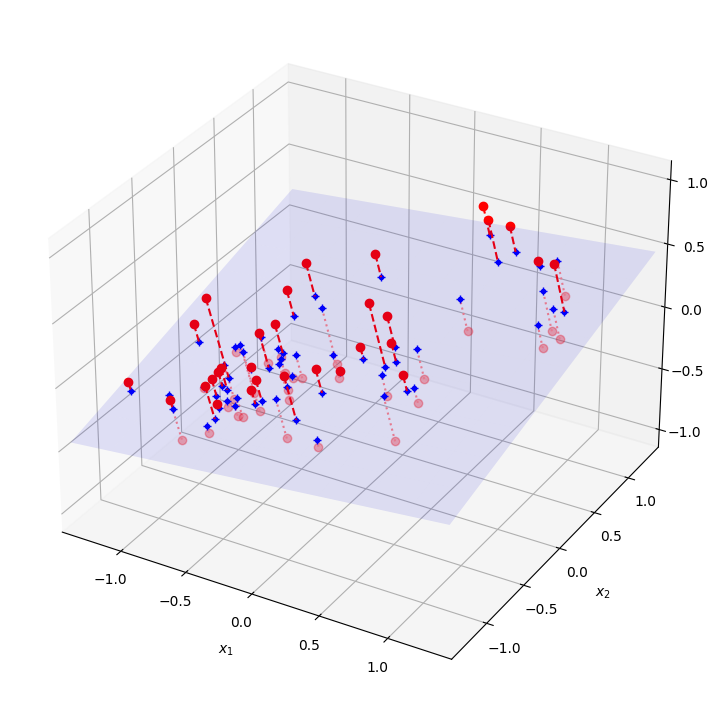

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])


set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5,1])

plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [ ]:
################### EXPLAINED VARIANCE RATIO ##################

In [ ]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [ ]:
1-pca.explained_variance_ratio_.sum()

0.09028309326742034

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) #Returns a vector whose elements are the cumulative sums, products, minima or maxima of the elements of the argument.
d = np.argmax(cumsum >= 0.95)+1 # each pixel provides different amount of information. we keep 95% of info and the pixels that give the most info
# argmax returns the index - it does not return the number itself

In [ ]:
d #here 95% of info is givesn by 154 pixels

154

In [ ]:
784 - d # the number of relatively unimportant pixels is 630

630

In [ ]:
pca.explained_variance_ratio_[:10]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001])

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
# We apply the same operations that we use on train data also on test data
X_test_reduced = pca.transform(X_test)


In [ ]:
pca.n_components_

154

In [ ]:
pca.explained_variance_ratio_.sum()

0.9501960192613035

In [ ]:
######## ELBOW METHOD (in order to find out which columns is best to keep) ###########################

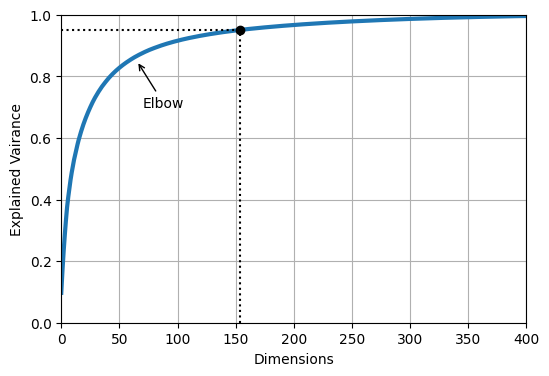

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Vairance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [ ]:
################ task ##########

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

rf_classifier = RandomForestClassifier()


rnd_pipeline=make_pipeline(PCA(), rf_classifier)

param_grid = {
    "randomforestclassifier__n_estimators": [30, 50, 70],
    'randomforestclassifier__criterion': ["gini", "entropy", "log_loss"],
    "pca__n_components": [30, 45, 60]
}



In [ ]:
rnd_search=RandomizedSearchCV(rnd_pipeline, param_grid, n_iter=10, cv=5)

In [ ]:
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   param_distributions={'pca__n_components': [30, 45, 60],
                                        'randomforestclassifier__criterion': ['gini',
                                                                              'entropy',
                                                                              'log_loss'],
                                        'randomforestclassifier__n_estimators': [30,
                                                                                 50,
                                                                                 70]})

In [ ]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 70,
 'randomforestclassifier__criterion': 'log_loss',
 'pca__n_components': 45}

In [ ]:
rnd_search.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=45)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss',
                                        n_estimators=70))])

In [ ]:
rnd_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=45)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss',
                                        n_estimators=70))])

In [ ]:
rnd_search.best_estimator_.score(X_test, y_test)

0.9533

In [ ]:
########################## task 2 w sgd classifier ########3

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

sgd_pipeline=make_pipeline(PCA(), SGDClassifier())

param_grid = {
    "pca__n_components": [30, 45, 60]
}

grid_search=GridSearchCV(sgd_pipeline, param_grid, cv=5)


In [ ]:
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': [30, 45, 60]})

In [ ]:
grid_search.best_params_

{'pca__n_components': 60}

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=60)),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

In [ ]:
########## PCA for Compression - reducing size of the data by deleting columns

In [ ]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train) #zipping here

In [ ]:
X_recovered= pca.inverse_transform(X_reduced) #unzipping again with inverse_transform. it's trying to assume which columns we deleted with pca in the "zipping part"

In [ ]:
# ENUMERATE
a=[1, 99, 1, 2]
for idx, i in enumerate(a): #idx means index
  print(idx, i)

In [ ]:
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100],X_recovered[::2100])):
  plt.subplot(1, 2, idx+1)
  plt.title(["Original", "Compressed"][idx])
  for row in range(5):
    for col in range(5):
      plt.imshow(X[row * 5 + col].reshape(28,28), cmap="binary",
                 vmin=0, vmax=255, extent=(row, row+1, col, col+1))
      plt.axis([0, 5, 0, 5])
      plt.axis("off")

In [ ]:
rnd_pca=PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced=rnd_pca.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [ ]:
#### LLE

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle= LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

In [ ]:
X_unrolled.shape # 1000 - the number of data, 2 - the number of shapes

(1000, 2)

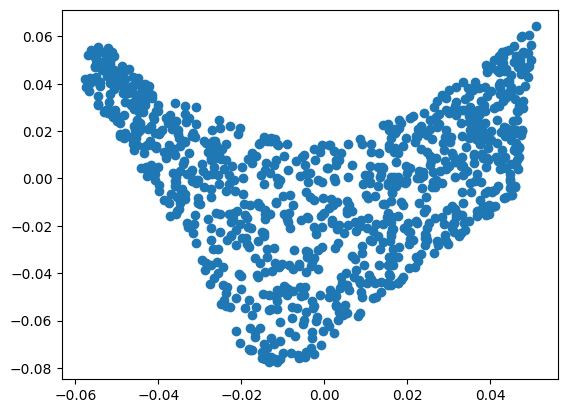

In [ ]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1]) # 0 ve 1 indekslerdi. 0 means hamisi uchun sol terefdeki giymetleri gotur, 1 ise sagdakilari gotur


In [ ]:
from matplotlib.colors import ListedColormap
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0,0.8,256)))
from matplotlib.colors import ListedColormap

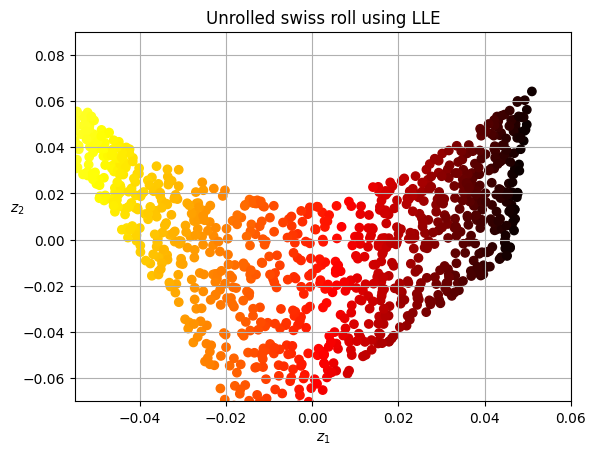

In [ ]:
plt.scatter(X_unrolled[:,0], X_unrolled[:,1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()

In [ ]:
X_sample, y_sample=X_train[:5000], y_train[:5000]

In [ ]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, init="random", learning_rate="auto", random_state=42)
%time X_reduced =tsne.fit_transform(X_sample)